In [2]:
%matplotlib inline
import pandas as pd
import numpy as np

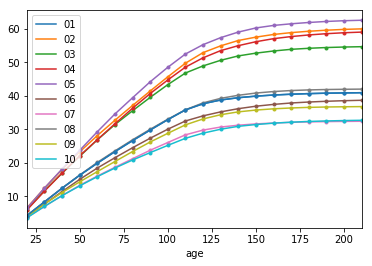

In [38]:
# functional data analysis: e.g. study growth rates
# instead of girls & boys (homework!), let's look at goblins & brownies
height_g = pd.read_csv('heights_goblins.csv', index_col='age')
height_g.plot(style='.-')
age_g, cols_g = height_g.index, height_g.columns
g01 = height_g['01']
g01.plot(style='.-')

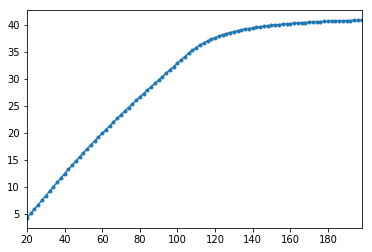

In [39]:
import scipy.interpolate as intpl
spl_g01 = intpl.CubicSpline(age_g, g01, bc_type='natural')
# we can now interpolate the height at many more ages
manyages = pd.Index(range(20, 200, 2))
many_g01 = spl_g01(manyages)
pd.Series(many_g01, index=manyages).plot(style='.-')

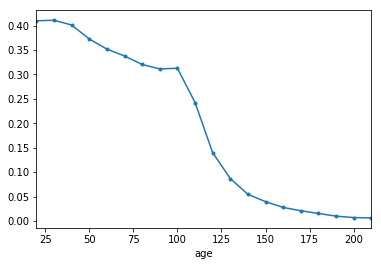

In [40]:
# we can also form the first and second derivative
der1_g01 = spl_g01.derivative(1)
der2_g01 = spl_g01.derivative(2)
growth_g01 = pd.Series(der1_g01(age_g), index=age_g).plot(style='.-')

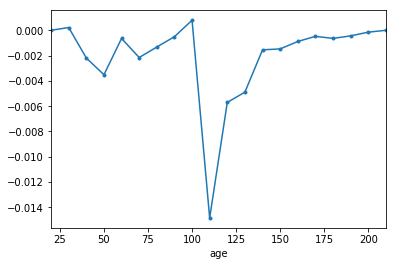

In [41]:
accel_g01 = pd.Series(der2_g01(age_g), index=age_g).plot(style='.-')

In [42]:
# let's start with two empty data frames and then populate them
growth_g = pd.DataFrame(index=age_g, columns=cols_g, dtype=float)
accel_g = pd.DataFrame(index=age_g, columns=cols_g, dtype=float)
for key in cols_g:
    column = height_g[key]
    spl = intpl.CubicSpline(age_g, column, bc_type='natural')
    der1 = spl.derivative(1)
    der2 = spl.derivative(2)
    growth_g[key] = der1(age_g)
    accel_g[key] = der2(age_g)

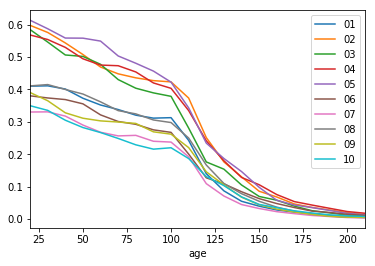

In [43]:
growth_g.plot()

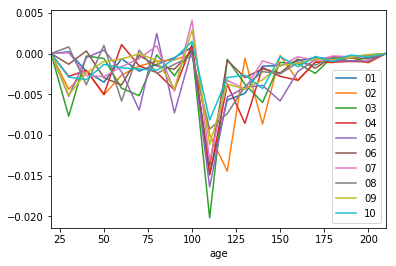

In [44]:
accel_g.plot()